In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-news-popularity-data-set/OnlineNewsPopularity/OnlineNewsPopularity.csv
/kaggle/input/online-news-popularity-data-set/OnlineNewsPopularity/OnlineNewsPopularity.names


In [2]:
#1. ENVIRONMENT SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

warnings.filterwarnings("ignore")
%matplotlib inline

sns.set(style="whitegrid")

# 2. LOAD DATA
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'OnlineNewsPopularity.csv'))
df.columns = df.columns.str.strip()  # remove trailing whitespaces
df.drop('url', axis=1, inplace=True)

df['log_shares'] = np.log1p(df['shares'])
df['popular'] = (df['shares'] > df['shares'].median()).astype(int)

In [3]:
# 3. TRAIN-TEST SPLIT 
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['popular'])

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

display(train_df.head())
display(train_df.describe())

Train shape: (31715, 62)
Test shape: (7929, 62)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares,popular
14162,458.0,11.0,848.0,0.447145,1.0,0.534031,14.0,4.0,20.0,0.0,...,-0.450000,-1.0,-0.166667,0.650000,0.000000,0.150000,0.000000,736,6.602588,0
2241,693.0,11.0,217.0,0.566820,1.0,0.716667,3.0,0.0,1.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.000000,1500,7.313887,1
30578,151.0,9.0,1015.0,0.458788,1.0,0.674825,1.0,1.0,6.0,0.0,...,-0.165712,-0.3,-0.100000,0.370000,0.230000,0.130000,0.230000,1500,7.313887,1
13107,478.0,13.0,106.0,0.666667,1.0,0.695652,3.0,3.0,0.0,1.0,...,-0.450000,-0.5,-0.400000,0.577273,-0.131818,0.077273,0.131818,438,6.084499,0
35448,74.0,14.0,963.0,0.540254,1.0,0.726050,13.0,2.0,2.0,6.0,...,-0.290724,-0.5,-0.100000,0.250000,0.250000,0.250000,0.250000,1200,7.090910,0


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares,popular
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,356.025004,10.390982,549.102412,0.551918,1.002775,0.692603,10.905313,3.300205,4.552168,1.245720,...,-0.259537,-0.522492,-0.107411,0.283670,0.071482,0.341004,0.156678,3407.943181,7.476551,0.493457
std,214.058822,2.118113,472.624514,3.935703,5.848117,3.649399,11.448719,3.879128,8.305581,4.111987,...,0.127671,0.290608,0.095210,0.324332,0.265893,0.188935,0.226407,11411.501816,0.931291,0.499965
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.693147,0.000000
25%,166.000000,9.000000,246.000000,0.470149,1.000000,0.625000,4.000000,1.000000,1.000000,0.000000,...,-0.328409,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,947.000000,6.854355,0.000000
50%,343.000000,10.000000,410.000000,0.538726,1.000000,0.690323,7.000000,3.000000,1.000000,0.000000,...,-0.253526,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,7.244942,0.000000
75%,545.000000,12.000000,719.000000,0.607863,1.000000,0.754386,14.000000,4.000000,4.000000,1.000000,...,-0.186806,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,7.937732,1.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,690400.000000,13.445028,1.000000


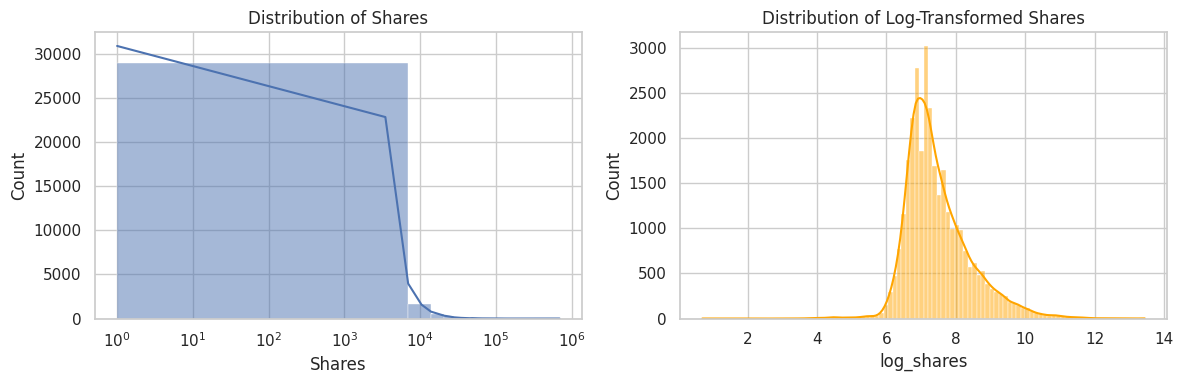

In [4]:
# 4. SHARES DISTRIBUTION
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(train_df['shares'], bins=100, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.histplot(train_df['log_shares'], bins=100, kde=True, color='orange')
plt.title('Distribution of Log-Transformed Shares')
plt.xlabel('log_shares')

plt.tight_layout()
plt.show()

In [5]:
# 6. MISSING VALUES CHECK
missing_counts = train_df.isnull().sum()
print("Missing values:\n", missing_counts[missing_counts > 0])

Missing values:
 Series([], dtype: int64)


Top 10 features most correlated with 'shares':
['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'LDA_02', 'self_reference_max_shares', 'data_channel_is_world', 'kw_avg_max', 'num_hrefs']


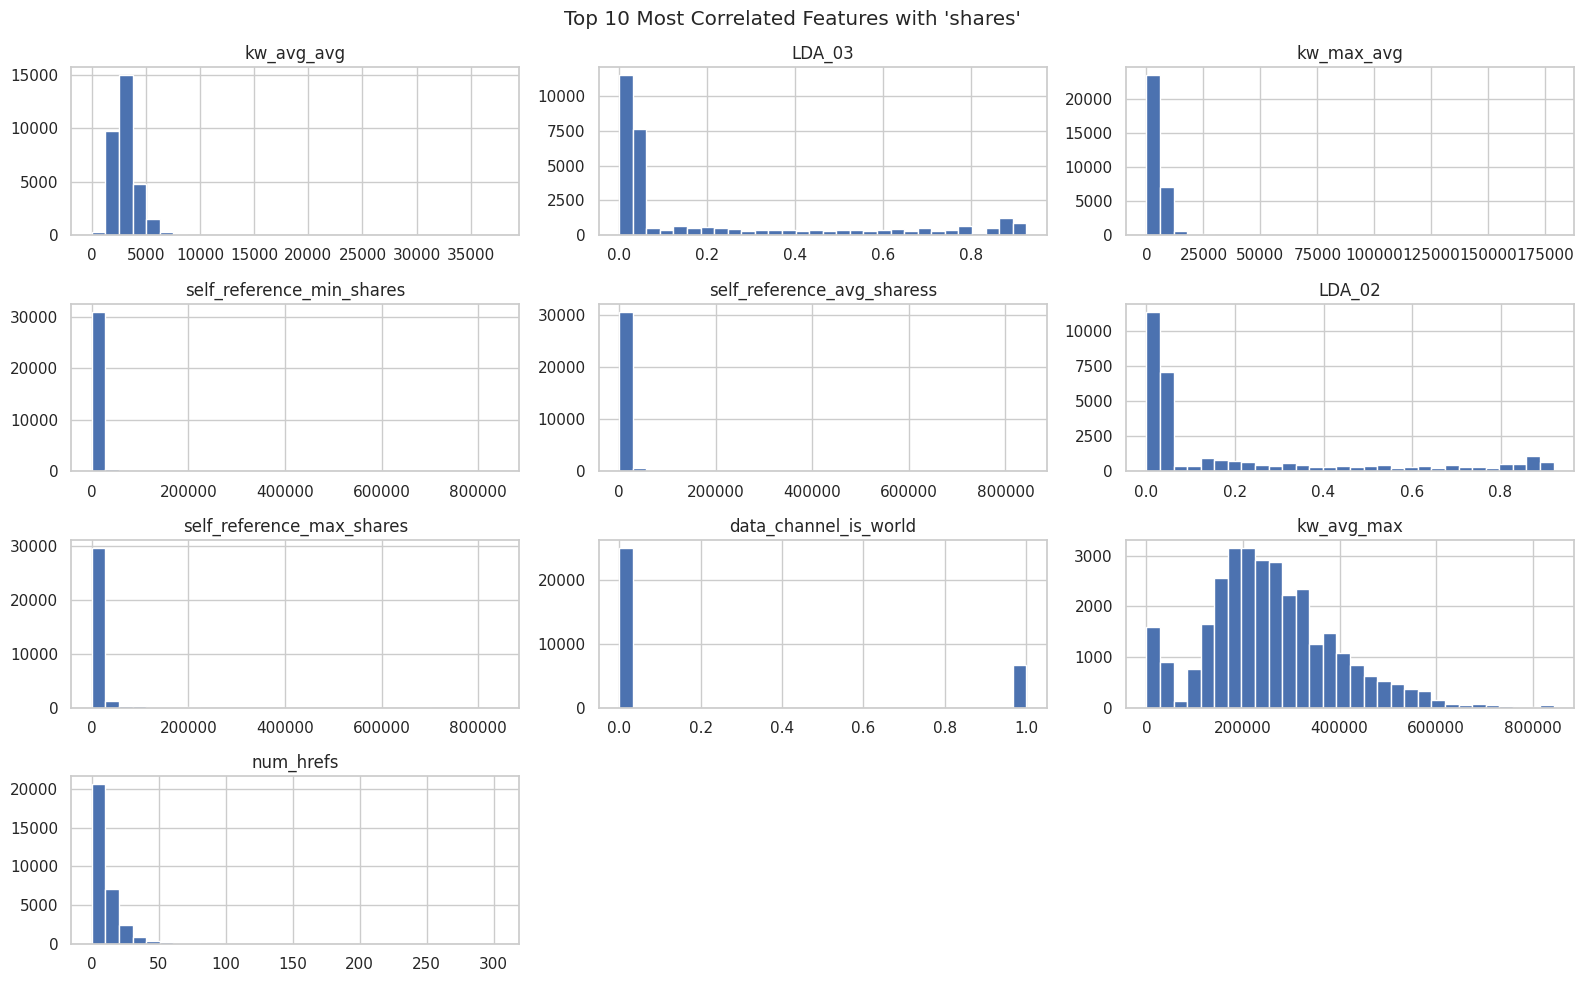


Examples of weakly correlated features:
['weekday_is_sunday', 'LDA_01', 'data_channel_is_bus']


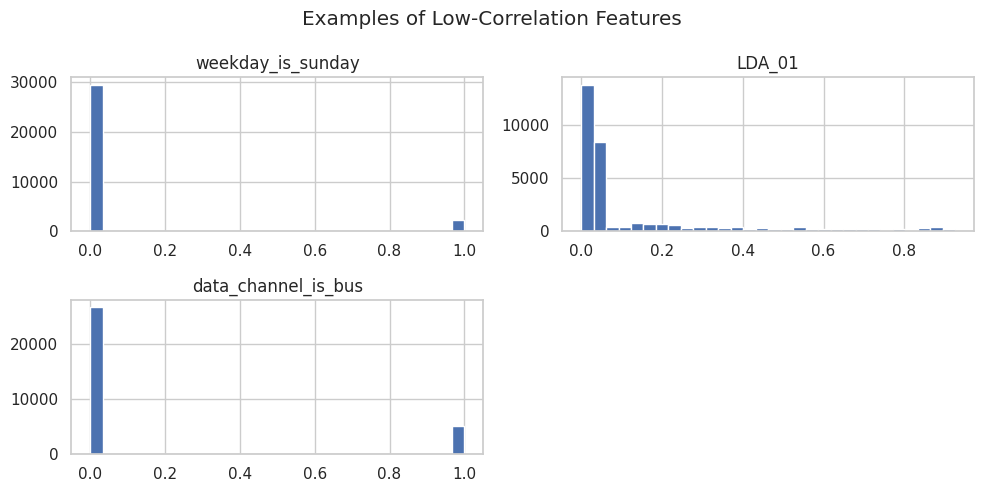

In [6]:
# 7. UNIVARIATE ANALYSIS - NUMERICAL
top_corr = train_df.corr()['shares'].abs().sort_values(ascending=False)
top_features = [feat for feat in top_corr.index if feat not in ['shares', 'log_shares', 'popular']][:10]

print("Top 10 features most correlated with 'shares':")
print(top_features)

train_df[top_features].hist(figsize=(16, 10), bins=30)
plt.suptitle("Top 10 Most Correlated Features with 'shares'")
plt.tight_layout()
plt.show()

low_corr = top_corr[top_corr < 0.01].index.tolist()[:3]
print("\nExamples of weakly correlated features:")
print(low_corr)

train_df[low_corr].hist(figsize=(10, 5), bins=30)
plt.suptitle("Examples of Low-Correlation Features")
plt.tight_layout()
plt.show()

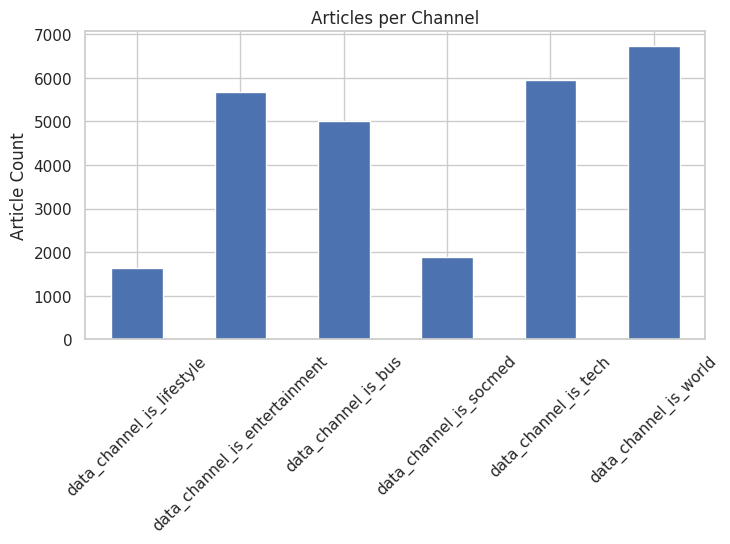

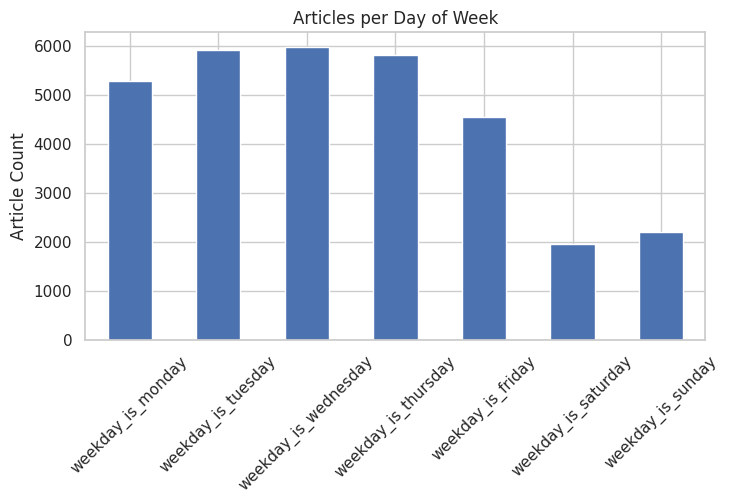

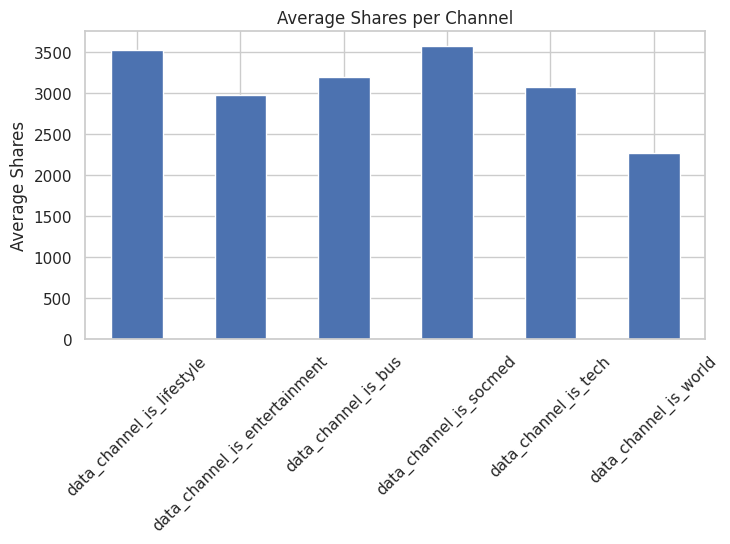

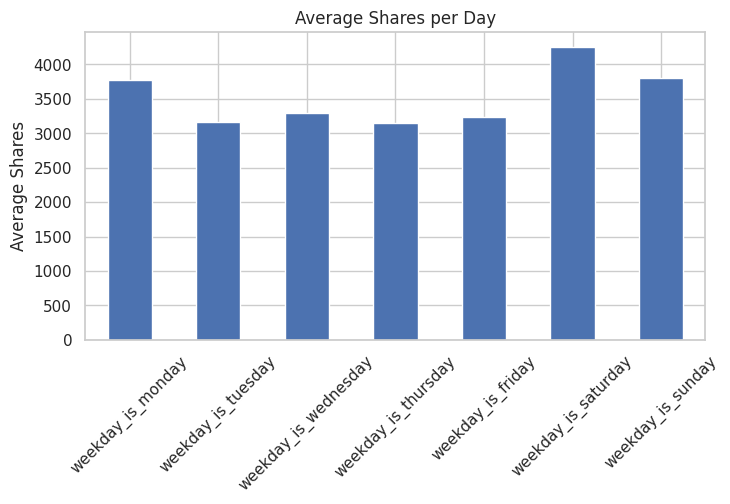

In [7]:
# 8. UNIVARIATE ANALYSIS - CATEGORICAL
channel_cols = [col for col in train_df.columns if col.startswith('data_channel')]
day_cols = [col for col in train_df.columns if col.startswith('weekday_is')]

# articles per channel
train_df[channel_cols].sum().plot(kind='bar', title='Articles per Channel', figsize=(8,4))
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

# articles per day
train_df[day_cols].sum().plot(kind='bar', title='Articles per Day of Week', figsize=(8,4))
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

# average shares per channel
channel_shares = train_df[channel_cols + ['shares']].copy()
for col in channel_cols:
    channel_shares[col] = channel_shares[col] * channel_shares['shares']
avg_shares_per_channel = channel_shares[channel_cols].sum() / train_df[channel_cols].sum()

avg_shares_per_channel.plot(kind='bar', figsize=(8, 4), title='Average Shares per Channel')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)
plt.show()

# average shares per day
day_shares = train_df[day_cols + ['shares']].copy()
for col in day_cols:
    day_shares[col] = day_shares[col] * day_shares['shares']
avg_shares_per_day = day_shares[day_cols].sum() / train_df[day_cols].sum()

avg_shares_per_day.plot(kind='bar', figsize=(8, 4), title='Average Shares per Day')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)
plt.show()

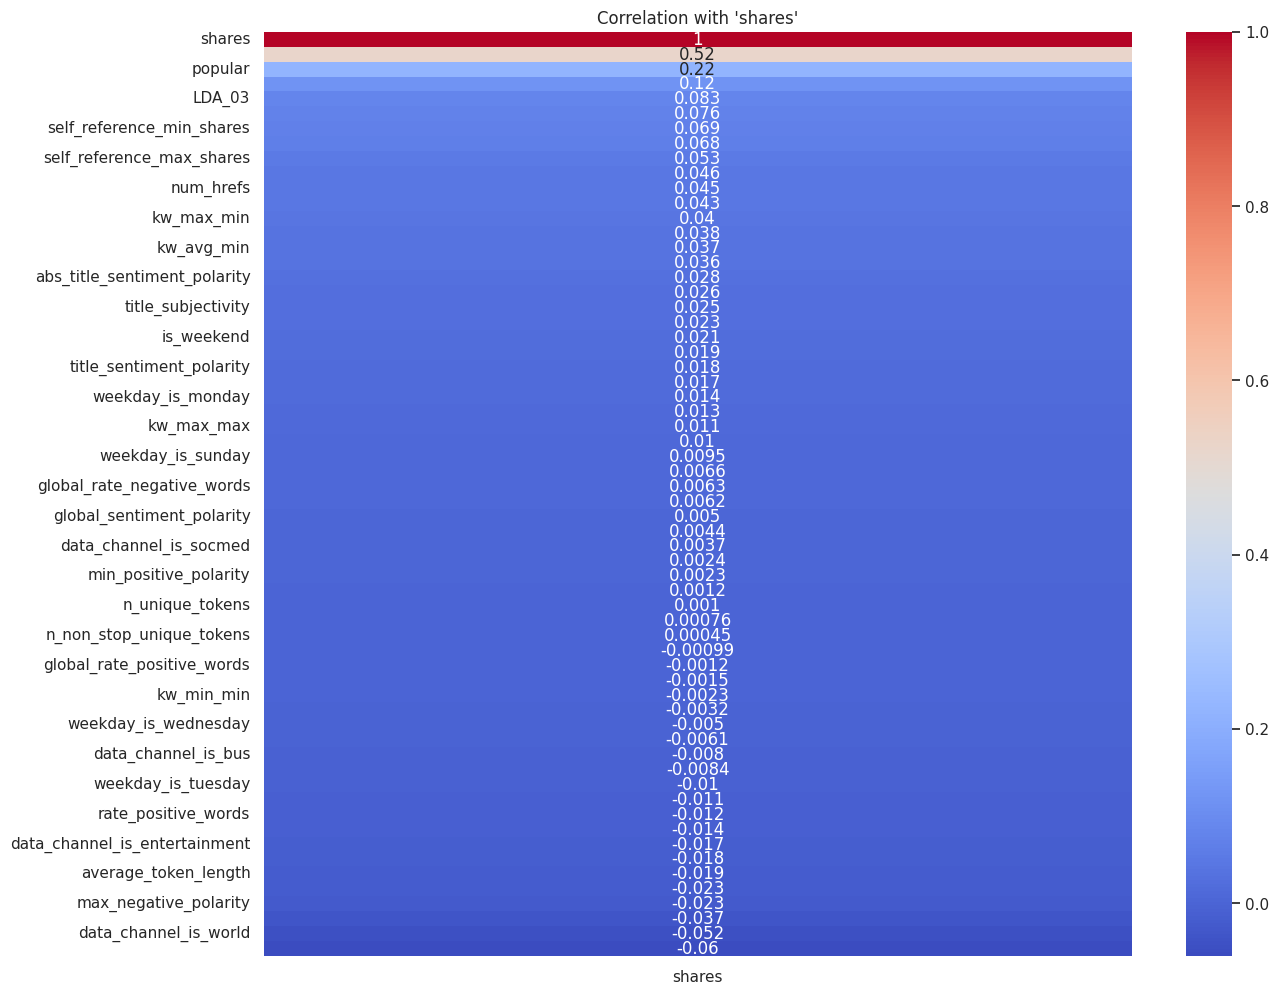

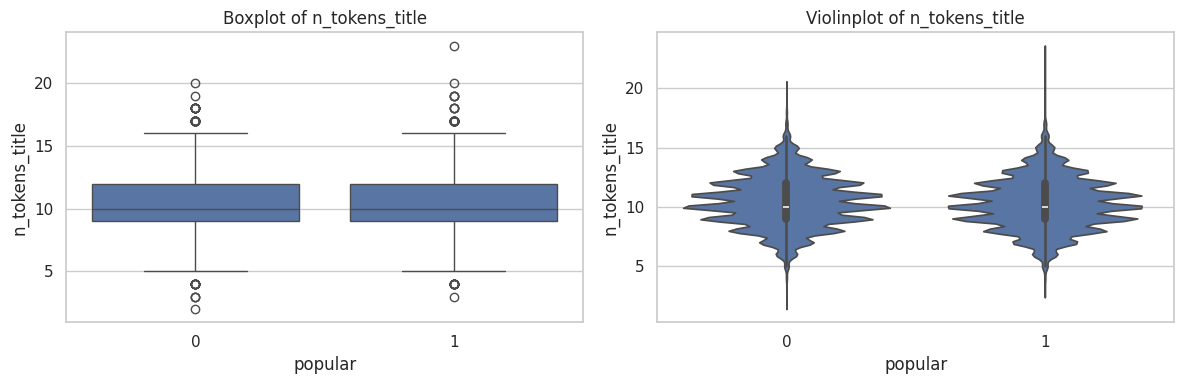

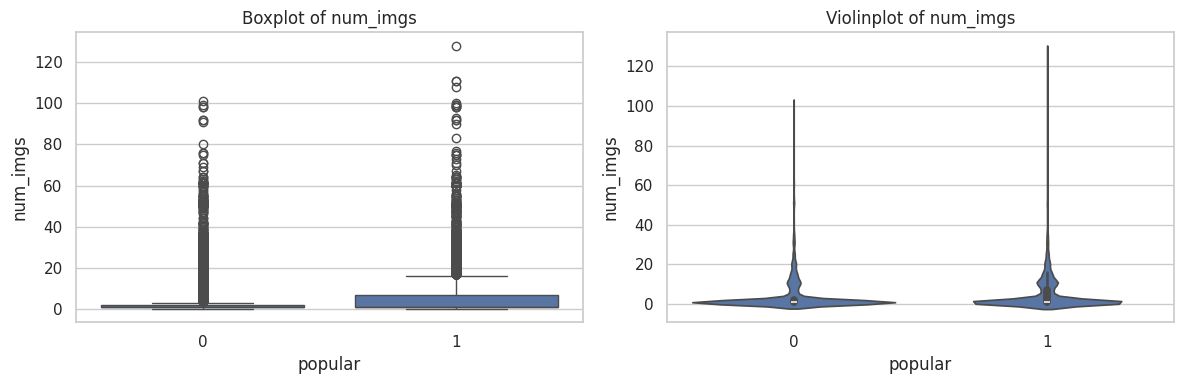

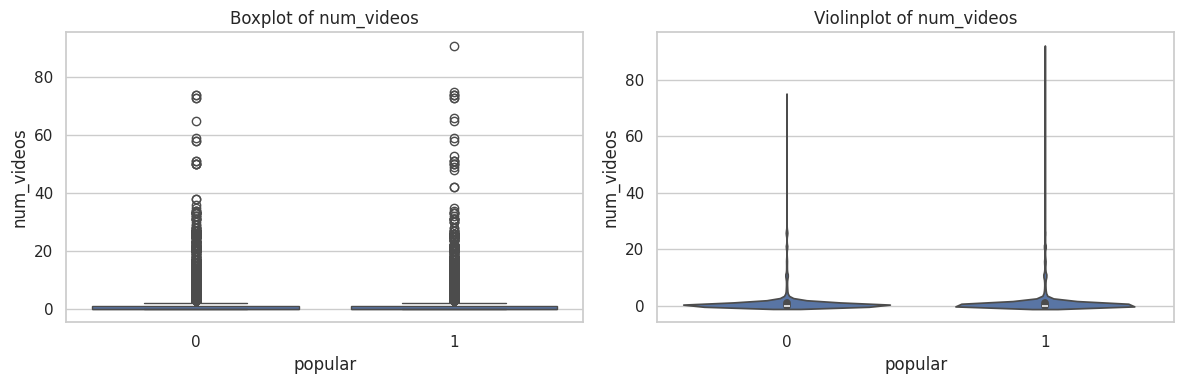

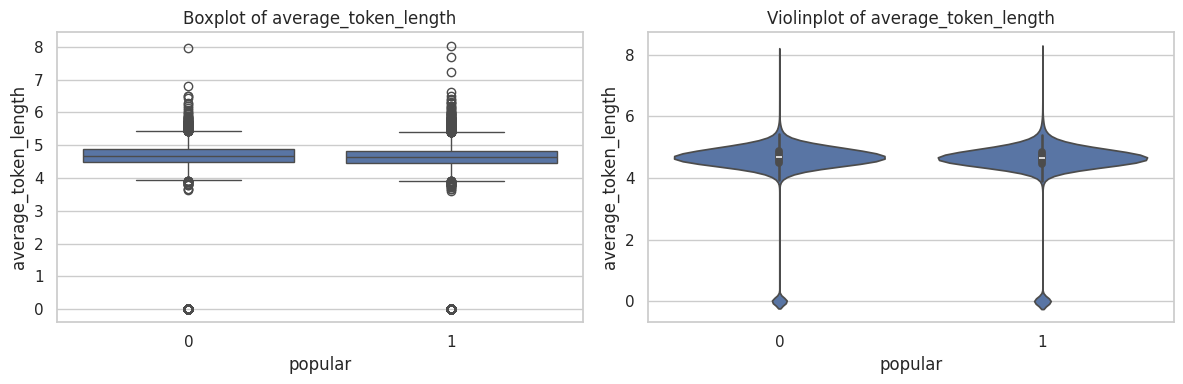

In [8]:
# 9. BIVARIATE ANALYSIS - Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = train_df.corr()
sns.heatmap(corr[['shares']].sort_values(by='shares', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with 'shares'")
plt.show()

# box & violin plots vs popularity
key_features = ['n_tokens_title', 'num_imgs', 'num_videos', 'average_token_length']
for feat in key_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x='popular', y=feat, data=train_df, ax=axes[0])
    sns.violinplot(x='popular', y=feat, data=train_df, ax=axes[1])
    axes[0].set_title(f'Boxplot of {feat}')
    axes[1].set_title(f'Violinplot of {feat}')
    plt.tight_layout()
    plt.show()

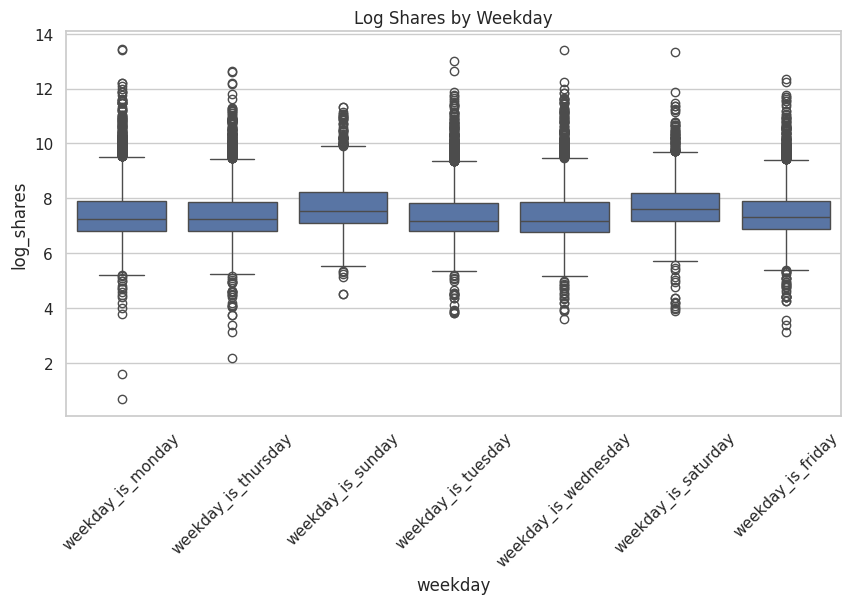

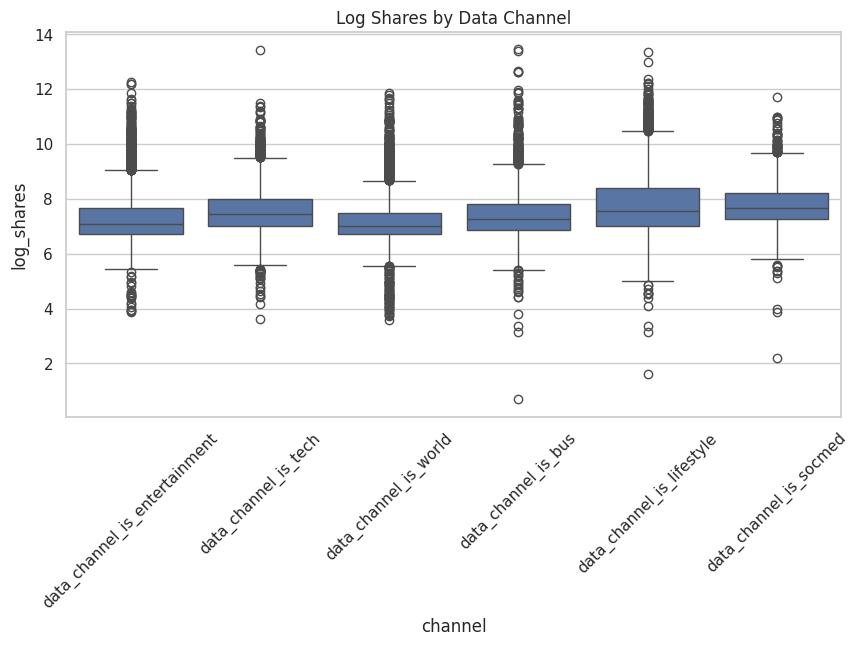

In [9]:
# 10. MULTIVARIATE ANALYSIS
train_df['weekday'] = train_df[day_cols].idxmax(axis=1)
train_df['channel'] = train_df[channel_cols].idxmax(axis=1)

plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='log_shares', data=train_df)
plt.xticks(rotation=45)
plt.title("Log Shares by Weekday")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='channel', y='log_shares', data=train_df)
plt.xticks(rotation=45)
plt.title("Log Shares by Data Channel")
plt.show()

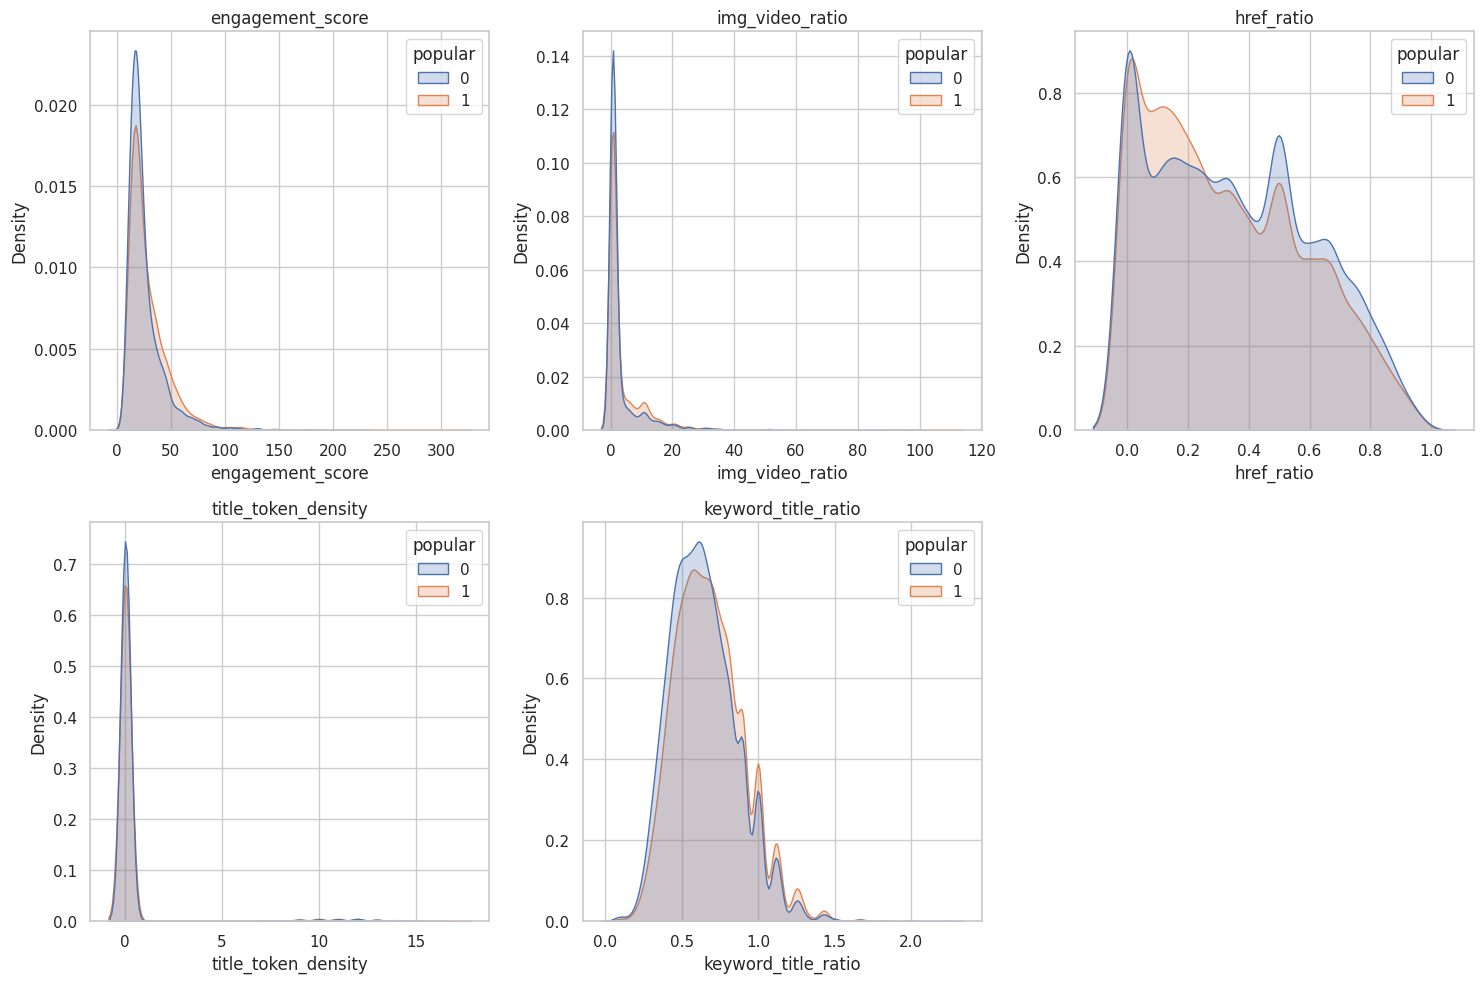

In [10]:
# 11. FEATURE ENGINEERING 
train_df['engagement_score'] = (
    train_df['num_hrefs'] +
    train_df['num_self_hrefs'] +
    train_df['num_imgs'] +
    train_df['num_videos'] +
    train_df['num_keywords']
)

train_df['img_video_ratio'] = train_df['num_imgs'] / (train_df['num_videos'] + 1)
train_df['href_ratio'] = train_df['num_self_hrefs'] / (train_df['num_hrefs'] + 1)
train_df['title_token_density'] = train_df['n_tokens_title'] / (train_df['n_tokens_content'] + 1)
train_df['keyword_title_ratio'] = train_df['num_keywords'] / (train_df['n_tokens_title'] + 1)

test_df['engagement_score'] = (
    test_df['num_hrefs'] +
    test_df['num_self_hrefs'] +
    test_df['num_imgs'] +
    test_df['num_videos'] +
    test_df['num_keywords']
)

test_df['img_video_ratio'] = test_df['num_imgs'] / (test_df['num_videos'] + 1)
test_df['href_ratio'] = test_df['num_self_hrefs'] / (test_df['num_hrefs'] + 1)
test_df['title_token_density'] = test_df['n_tokens_title'] / (test_df['n_tokens_content'] + 1)
test_df['keyword_title_ratio'] = test_df['num_keywords'] / (test_df['n_tokens_title'] + 1)

feature_list = ['engagement_score', 'img_video_ratio', 'href_ratio', 'title_token_density', 'keyword_title_ratio']

plt.figure(figsize=(15, 10))
for i, feat in enumerate(feature_list, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=train_df, x=feat, hue='popular', fill=True)
    plt.title(feat)
plt.tight_layout()
plt.show()

RMSE test:  0.8462


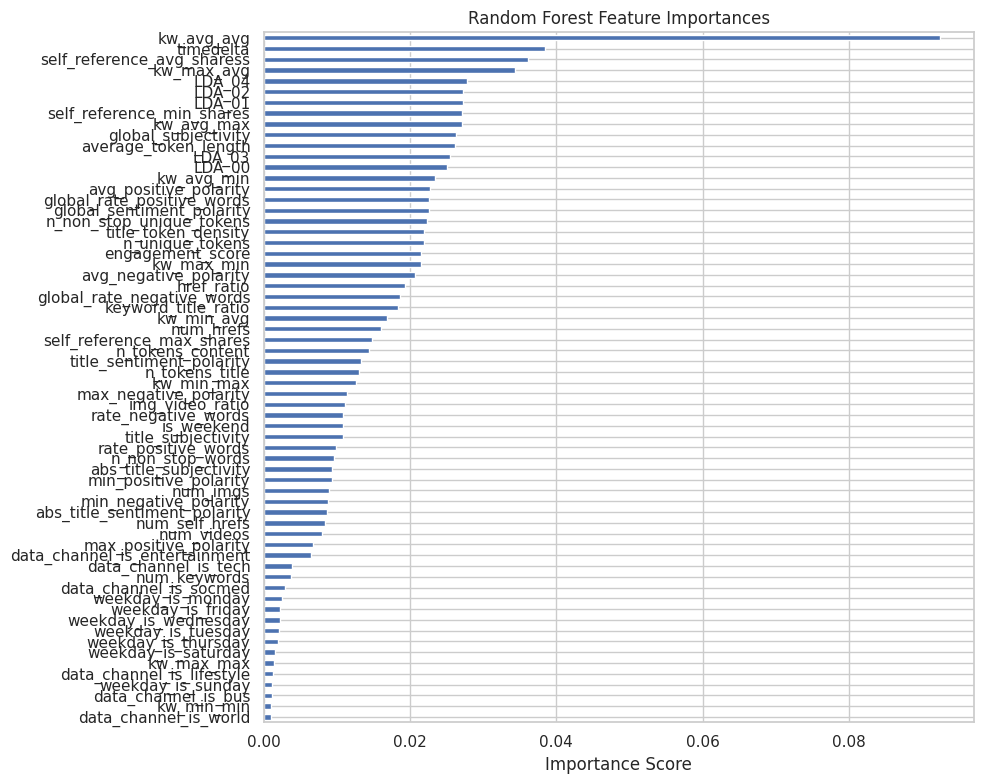

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

base_features = [
    col for col in train_df.columns
    if col not in ['shares', 'log_shares', 'popular', 'weekday', 'channel',
                   'engagement_score', 'img_video_ratio', 'href_ratio', 
                   'title_token_density', 'keyword_title_ratio']
]

engineered_features = base_features + feature_list

X = train_df[engineered_features]
y = train_df['log_shares']
X_test = test_df[engineered_features]
y_test = test_df['log_shares']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

y_pred_test = rf.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE test:  {rmse_test:.4f}")

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# Tune the threshold for selecting top performing features using cross-validation

# Try different thresholds for feature importance to select top features
thresholds = [0.005, 0.01, 0.02, 0.03, 0.05]
results = []

for thresh in thresholds:
    selected_features = importances[importances > thresh].index.tolist()
    if not selected_features:
        continue  # skip if no features selected
    X_sel = X[selected_features]
    scaler_sel = StandardScaler()
    X_sel_scaled = scaler_sel.fit_transform(X_sel)
    rf_sel = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Use cross-validation instead of test set evaluation
    cv_scores = cross_val_score(rf_sel, X_sel_scaled, y, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-cv_scores.mean())
    rmse_cv_std = np.sqrt(cv_scores.std())
    
    results.append({
        'threshold': thresh,
        'n_features': len(selected_features),
        'rmse_cv': rmse_cv,
        'rmse_cv_std': rmse_cv_std
    })
    print(f"Threshold: {thresh:.3f} | Features: {len(selected_features)} | RMSE CV: {rmse_cv:.4f} (+/- {rmse_cv_std:.4f})")

# Display results as a DataFrame
results_df = pd.DataFrame(results)
display(results_df)

# Optionally, plot RMSE vs threshold
plt.figure(figsize=(8, 5))
plt.errorbar(results_df['threshold'], results_df['rmse_cv'], yerr=results_df['rmse_cv_std'], marker='o', capsize=5)
plt.xlabel('Feature Importance Threshold')
plt.ylabel('Cross-Validation RMSE')
plt.title('Cross-Validation RMSE vs Feature Importance Threshold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
df_final_train.to_csv('data/df_final_train.csv', index=False)
df_final_test.to_csv('data/df_final_test.csv', index=False)